In [41]:
# Copyright 2022 ns
# 
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
# 
#     http://www.apache.org/licenses/LICENSE-2.0
# 
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import pandas as pd
import numpy as np
import tensorflow as tf


In [42]:
#read hte dataset
dataset = '/Users/ns/development/iisc/WLDS2/data/out/dataset_1.csv'

dataset_df = pd.read_csv(dataset)
dataset_df.head()
normalised=False

#***


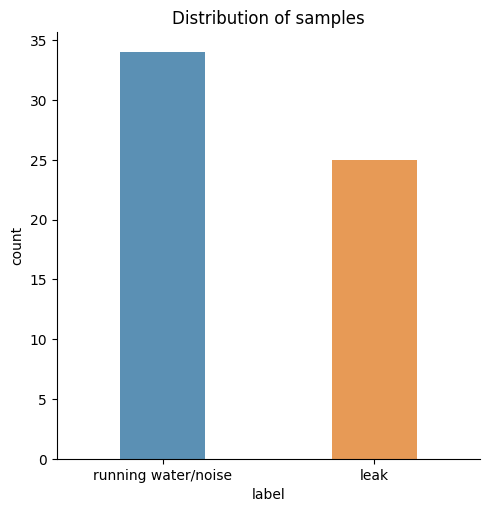

In [43]:
#Frequency distribution of  data
import matplotlib.pyplot as plt 
import seaborn as sns

sns.catplot(x='label', data=dataset_df, kind='count', width=0.4, alpha=0.8)
# set the title
plt.title('Distribution of samples')
# show the plot
plt.show()

####

In [44]:
#normalize feature data - should we use it? 

from sklearn import preprocessing
normalised = True
ind_columns = ['spectral_centroid', 'spectral_bandwidth',
               'spectral_rolloff', 'onset_strength',
               'mfcc', 'zero_crossing_rate', 'percussion']
feature_arr = np.array(dataset_df[ind_columns])
norm_feat_arr = preprocessing.normalize(feature_arr)
print(norm_feat_arr)


[[ 3.62866148e-01  3.94435367e-01  8.44243464e-01  1.50991217e-04
  -1.36054701e-03  1.61038518e-05  6.34281550e-08]
 [ 4.54220109e-01  3.01890998e-01  8.38179866e-01  1.18979554e-04
  -6.43448933e-04  3.43010633e-05  2.05305008e-07]
 [ 3.32955498e-01  5.12265012e-01  7.91657972e-01  2.14961378e-04
  -1.67424058e-03  7.66781863e-06  7.09441108e-08]
 [ 5.48859002e-01  2.27398505e-01  8.04389847e-01  9.01267053e-05
  -8.23773772e-04  5.20881991e-05  4.25688014e-07]
 [ 4.03973364e-01  3.42802867e-01  8.48109342e-01  1.29320594e-04
  -1.49750315e-03  2.48970666e-05  2.46149788e-07]
 [ 4.34784151e-01  3.29164103e-01  8.38220022e-01  2.07822942e-04
  -9.41030948e-04  2.24196408e-05  7.52502910e-07]
 [ 3.64654634e-01  4.26915812e-01  8.27507543e-01  1.73176216e-04
  -1.05951568e-03  1.41575970e-05  1.24204756e-07]
 [ 3.44884737e-01  4.00877873e-01  8.48734792e-01  1.43543042e-04
  -8.24499296e-04  1.02800580e-05  1.77845617e-07]
 [ 3.94484287e-01  3.77972629e-01  8.37566695e-01  1.76053429e-0

In [45]:
#convert the data to appropriate axes, use either normalised or un-normalised data

from keras.utils import to_categorical 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

ind_columns = ['spectral_centroid', 'spectral_bandwidth',
               'spectral_rolloff', 'onset_strength',
               'mfcc', 'zero_crossing_rate', 'percussion']

y = np.array(dataset_df['label']).tolist()
#print(y)
le = LabelEncoder()
#- labels into class
y = to_categorical(le.fit_transform(y))

if normalised:
    #for normalised
    X = norm_feat_arr
    out_file_path = '/Users/ns/development/iisc/WLDS2/normal_out/'
else:
    #for un_normalised
    X = np.array(dataset_df[ind_columns])
    out_file_path = '/Users/ns/development/iisc/WLDS2/un_normal_out/'



In [46]:
import tensorflow as tf
# print(tf.__version__)

from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Activation,  Flatten
from keras.optimizers import Adam
from keras import metrics, losses


In [47]:
# #NN Architecture 

model = Sequential([layers.Dense(100, activation='relu'),
                    #layers.Dropout(0.3),
                    layers.Dense(100, activation="relu"), 
                    #layers.Dropout(0.3),
                    layers.Dense(2, activation="softmax")
                        ])
#print("Gone past")
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer='Adam')


In [52]:
#Result analysis - this function is called later from the main cells
#plots train and test accuracy on one plot and train and test loss on another
#parameters are test split, epochs, history, train and test scores 
def plot_data(split, e, his, train_score, test_score):
    
    X = np.linspace(0, e, e)
    # Assign variables to the y axis part of the curve
    y = his.history['accuracy']
    z = his.history['val_accuracy']

    figure, (acc, los) = plt.subplots(1, 2, figsize=(8, 4))
   
    test_avg_acc  = 'avg acc {acc}'.format(acc=round(test_score[1],4))
    # print("train_avg_acc=" , train_avg_acc)
    # Plotting both the curves simultaneously
    acc.plot(X, y, color='c',   label='train', linewidth=2, linestyle=':' )
    acc.plot(X, z, color='y',  label='val', linewidth=2, linestyle='-.')
    acc.set_title("Accuracy")
  
    los.plot(X, his.history['loss'], color='c',
             label='train', linewidth=2, linestyle=':')
    los.plot(X, his.history['val_loss'], color='y',
             label='val', linewidth=2, linestyle='-.')
    los.set_title("Loss")
    test_avg_loss = 'avg acc {los}'.format(los=round(test_score[0],4))
    
    if normalised:
        acc.set_yticks(np.linspace(0, 1, 10))
        los.set_yticks(np.linspace(0, 1.4, 14))
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left", fontsize=10)  
    figure.suptitle('Test split = {split}, #Epochs = {e}'.format(
        split=split, e=e), fontsize=20, fontweight='bold')
    figure.subplots_adjust(top=.8)
    
    plt.savefig(out_file_path + 'plot_{split}_{e}.png'.format(
        split=split, e=e), bbox_inches='tight')

    plt.show()
   
    return


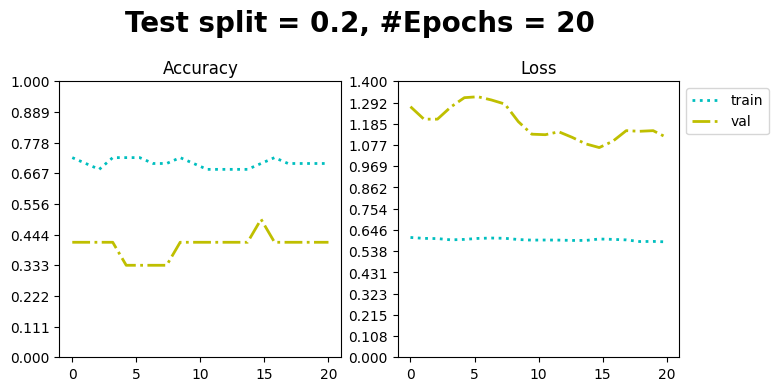

1/1 [==============================] - 0s 67ms/step


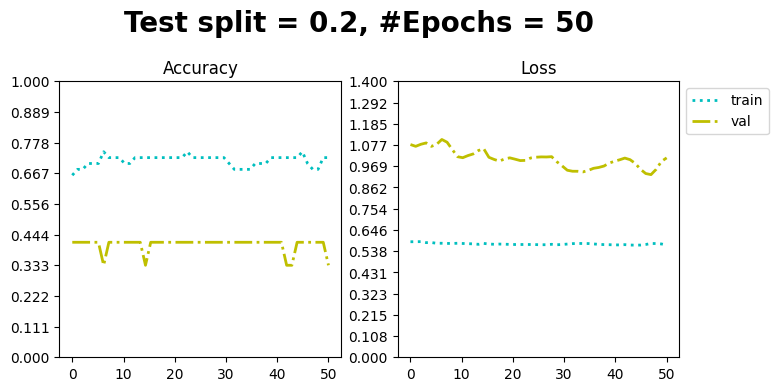

1/1 [==============================] - 0s 48ms/step


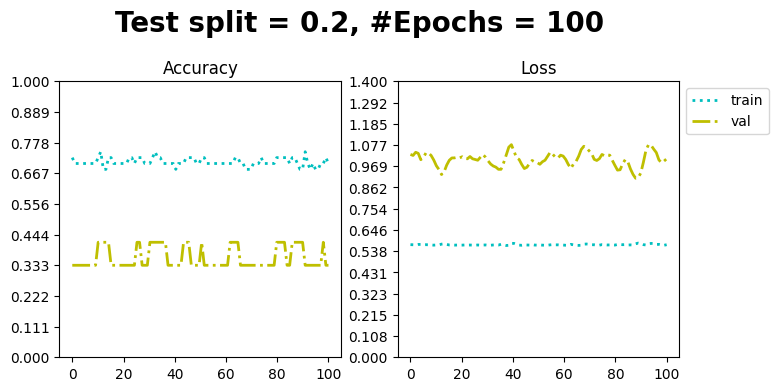

1/1 [==============================] - 0s 36ms/step


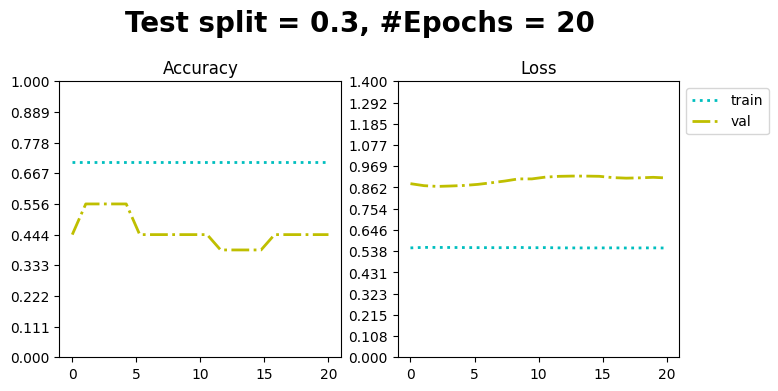

1/1 [==============================] - 0s 36ms/step


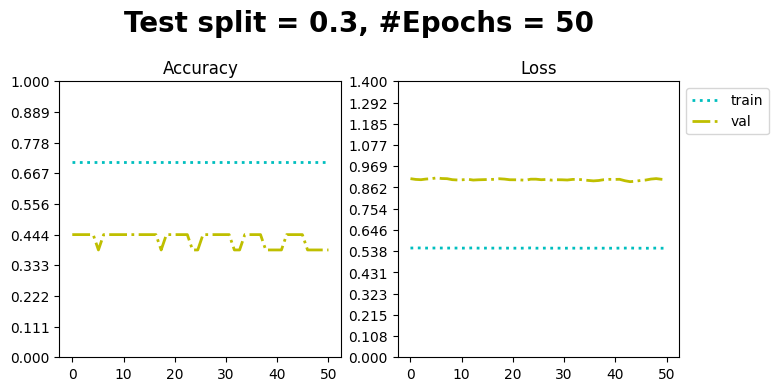

1/1 [==============================] - 0s 69ms/step


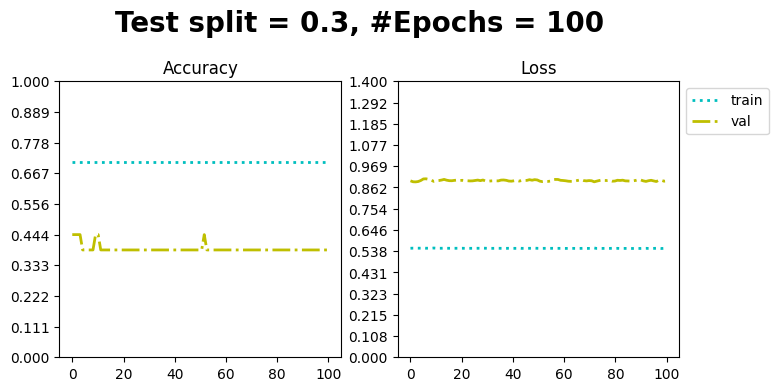

1/1 [==============================] - 0s 33ms/step


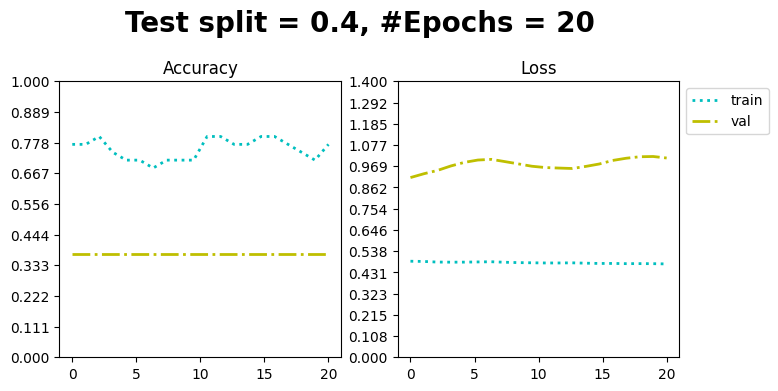

1/1 [==============================] - 0s 28ms/step


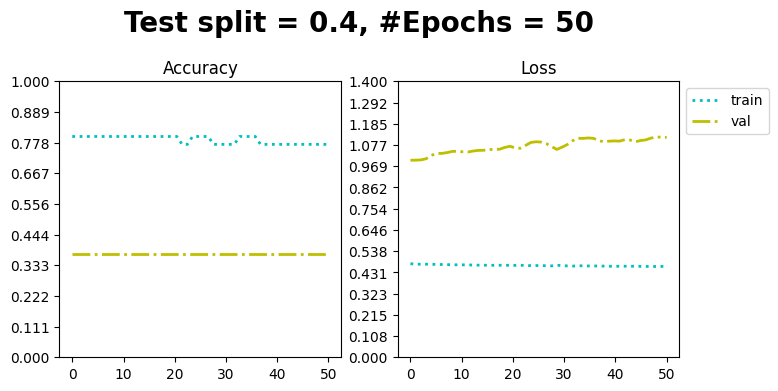

1/1 [==============================] - 0s 32ms/step


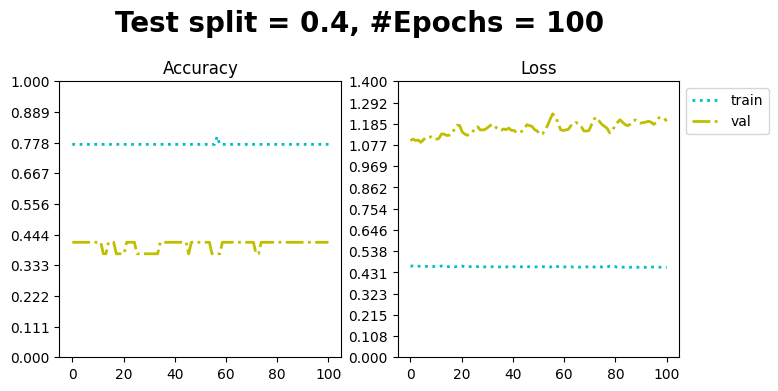

1/1 [==============================] - 0s 34ms/step


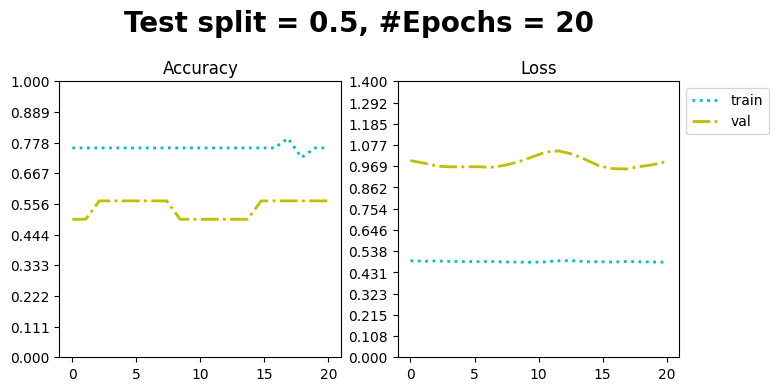

1/1 [==============================] - 0s 50ms/step


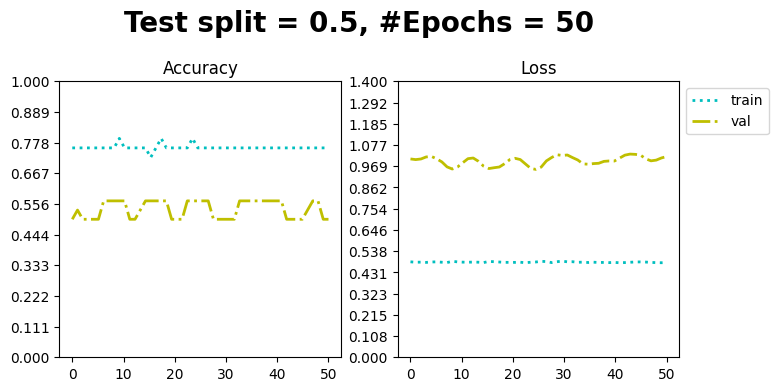

1/1 [==============================] - 0s 84ms/step


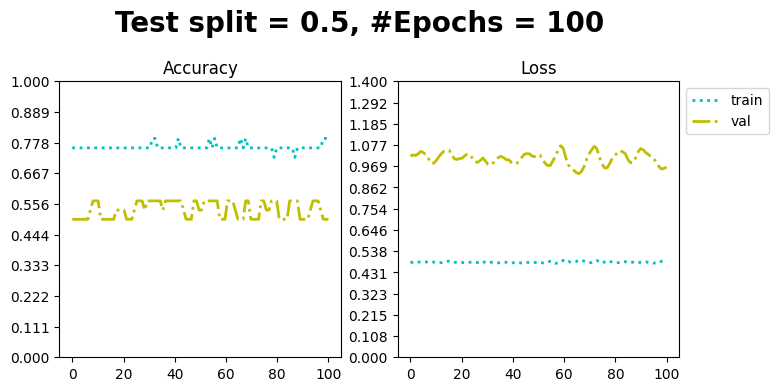

1/1 [==============================] - 0s 47ms/step


In [53]:
### main cell 
# for different split proprtions and different epochs, fir the model
# evaluate, plot and save the results
import warnings
warnings.filterwarnings('ignore')
#Split data & Train the model

split_set = [.2, .3, .4, .5]
num_epochs = [20, 50, 100]
num_batch_size = 21

#for testing
# split_set = [.2]
# num_epochs = [10]


#train the model
saved_results = []
saved_metrics = []
for test_set in split_set:
    X_train, X_test, y_train,  y_test = train_test_split(
        X, y, test_size=test_set, random_state=0)
  #  print(X_train.shape, X_test.shape)

    for tr_epoch in num_epochs:
        #print(X_test.shape, y_test.shape)
        # print(X_train.dtype, y_train.dtype)
        history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=tr_epoch,
            verbose=0, validation_data=(X_test, y_test))
        
        train_score = model.evaluate(X_train, y_train, verbose=0)
        test_score = model.evaluate(X_test, y_test, verbose=0)
    
        plot_data(test_set, tr_epoch, history, train_score, test_score)

        #prediction
        pred = model.predict(X_test)
        pred = np.argmax(pred, axis=1)
        label = np.argmax(y_test, axis=1)
        # print("Pred", pred)
        # print("label", label )
        saved_results.append(
            [test_set, X_train.shape[0], X_test.shape[0], tr_epoch,
             history.history['loss'], history.history['accuracy'],
             history.history['val_loss'], history.history['val_accuracy']])
        saved_metrics.append([test_set, tr_epoch, pred, label, test_score])
        #print("(%f, %s) predicted: %s, actual: %s", (test_set, tr_epoch, pred, label))
        
 #training done, resutlts plotted and saved




In [54]:
#print("Convert to df and save")

saved_columns = ['test split', 'train samples', 'test samples','epochs', 
        'train_loss', 'train_accuracy', 'val_loss', 'val_accuracy']

# all data used for the plots to be saved to plots_1.csv
results_df = pd.DataFrame(saved_results, columns=saved_columns)
results_df

#out_file_path = '/Users/ns/development/iisc/WLDS2/normal_out/'
results_df.to_csv(out_file_path + 'plots_1.csv', index=False)

#metrics and prediction to be saved in metrics_1.csv
metrics_cols = ['test_set', 'tr_epoch', 'pred', 'label', 'test_score']
metrics_df = pd.DataFrame(saved_metrics, columns=metrics_cols)
metrics_df.to_csv(out_file_path + 'metrics_1.csv', index=False)
metrics_df

####End of training. result and metrics file is saved. 


,test_set,tr_epoch,pred,label,test_score
0,0.2,20,"[1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0]","[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]","[1.114831805229187, 0.4166666567325592]"
1,0.2,50,"[1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0]","[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]","[1.0114738941192627, 0.3333333432674408]"
2,0.2,100,"[1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0]","[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]","[1.0068113803863525, 0.3333333432674408]"
3,0.3,20,"[1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, ...","[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, ...","[0.9095809459686279, 0.4444444477558136]"
4,0.3,50,"[1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, ...","[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, ...","[0.9005572199821472, 0.3888888955116272]"
5,0.3,100,"[1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, ...","[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, ...","[0.8946654796600342, 0.3888888955116272]"
6,0.4,20,"[1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, ...","[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, ...","[1.0107816457748413, 0.375]"
7,0.4,50,"[1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, ...","[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, ...","[1.115151286125183, 0.375]"
8,0.4,100,"[1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, ...","[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, ...","[1.1975748538970947, 0.4166666567325592]"
9,0.5,20,"[1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, ...","[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, ...","[0.9936808347702026, 0.5666666626930237]"
